# Exploratory Analysis Report of Salary for the NBA 2022-23 Season

The NBA has been making headlines for years with the enormous contracts that superstars such as LeBron James, Stephen Curry, and Kevin Durant have received.  Many of these contracts are in excess of 40 million USD per *year*, and thanks to the prosperity of the league the contracts only show signs of growing. Just this summer, Jaylen Brown signed a 5 year 304 million dollar contract, making him the highest paid player in the league annually. But while the star players watch their salaries skyrocket, what about the rest of the league?  This report aims to have a look at salaries across the league for the 2022-23 season and reveal insights such as who is getting paid the most/least, which positions are getting paid the most/least, which stats correlate the most with salary, and other things either interesting or important. 

### Acknowledgments & Limitations:  
The dataset used for this analysis was gathered from https://www.basketball-reference.com/, and some salary numbers were cross referenced with https://hoopshype.com/.  

Due to the NBA having G-League 2 way contracts, 10 day contracts, contract waiving, and other such things it is very difficult to get a salary dataset for *every* player to see the floor for a season.  As such, this is just a (large) sample of the true population. In order to conduct any useful analysis, players that had stats recorded for the season on basketball-reference, but did not have a salary recorded on the website for the season were removed from the dataset.  Although it is sad to say, but if your salary wasn't recorded on basketball reference, your statistical impact probably wasn't significant either.

These salary numbers were pulled for the start of the season, therefore any buyouts, contract negotations, or anything of the sort are not reflected. In the example of buy outs, players and their team can choose to pay out the contract to release the player, but perhaps at a price less than what they are fully owed.  These numbers are not made public so it would be impossible to tally their true earnings for the season, which is I've chosen to just work with the salary numbers dictated in their contract for simplicity.

## Table of Contents?
 #### - Executive Summary
 #### - Introduction
 #### - Body/Analysis
 #### - Conclusion
 #### - Appendix
 #### - Profit?

***
### Body

First we need to import my python file with the analysis, along with any necessary libraries to display graphs and tables. 

In [ ]:
"""Need to import SalaryAnalysis from the scripts folder now"""
#import SalaryAnalysis as sa
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

sa.df.head()

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,pid,salary,PPG,APG,TRPG,SPG,BPG,astToTO,dollarPerMinute,dollarPerFG,dollarPerPoint
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,C,23,TOR,55,12,1140,196,404,0.485,29,108,0.269,167,296,0.564,0.521,87,124,0.702,100,228,328,50,31,30,59,102,508,achiupr01,2840160,9.2,0.9,6.0,0.6,0.5,0.8,2491.37,14490.61,5590.87
Steven Adams,C,29,MEM,42,42,1133,157,263,0.597,0,1,0.000,157,262,0.599,0.597,47,129,0.364,214,271,485,97,36,46,79,98,361,adamsst01,17926829,8.6,2.3,11.5,0.9,1.1,1.2,15822.44,114183.62,49658.81
Bam Adebayo,C,25,MIA,75,75,2598,602,1114,0.540,1,12,0.083,601,1102,0.545,0.541,324,402,0.806,184,504,688,240,88,61,187,208,1529,adebaba01,30351780,20.4,3.2,9.2,1.2,0.8,1.3,11682.75,50418.24,19850.74
Ochai Agbaji,SG,22,UTA,59,22,1209,165,386,0.427,81,228,0.355,84,158,0.532,0.532,56,69,0.812,43,78,121,67,16,15,41,99,467,agbajoc01,3918360,7.9,1.1,2.1,0.3,0.3,1.6,3240.99,23747.64,8390.49
Santi Aldama,PF,22,MEM,77,20,1682,247,525,0.470,94,266,0.353,153,259,0.591,0.560,108,144,0.750,85,286,371,97,45,48,60,143,696,aldamsa01,2094120,9.0,1.3,4.8,0.6,0.6,1.6,1245.02,8478.22,3008.79


Above is a small sample of the data. Most of the columns are basic counting stats (points, rebounds, assists, blocks), others are tracking stats (games played, games started, minutes played), and a few are columns I created on my own for analysis (dollar per minute/fieldgoal/point, assist to turnover ratio).

One of the first things we want to look at are the maximum and minimum salaries in the league, who they belong to and if their stats give any indication to their salaries initially.

In [3]:
sa.df.query('salary == salary.min() or salary == salary.max()')

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,pid,salary,PPG,APG,TRPG,SPG,BPG,astToTO,dollarPerMinute,dollarPerFG,dollarPerPoint
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,PG,34,GSW,56,56,1941,559,1133,0.493,273,639,0.427,286,494,0.579,0.614,257,281,0.915,39,302,341,352,52,20,179,117,1648,curryst01,48070014,29.4,6.3,6.1,0.9,0.4,2.0,24765.59,85992.87,29168.7
Stanley Umude,SG,23,DET,1,0,2,0,1,0.000,0,1,0.000,0,0,NaN,0.000,2,2,1.000,0,0,0,0,1,1,0,0,2,umudest01,58493,2.0,0.0,0.0,1.0,1.0,NaN,29246.50,NaN,29246.5


For the 2022-23 season, Stephen Curry was the highest earner at 48 million, meanwhile the lowest earner was Stanley Umude at 58 thousand dollars. This is a shocking disparity, as 58 thousand seems almost unbelievably low for a professional athlete. However, Stanley only appeared in 1 game and played 2 minutes, not a bad compensation for only 2 minutes of work.

This disparity makes us wonder what the distribution of salary looks like. A histogram could help paint the picture.

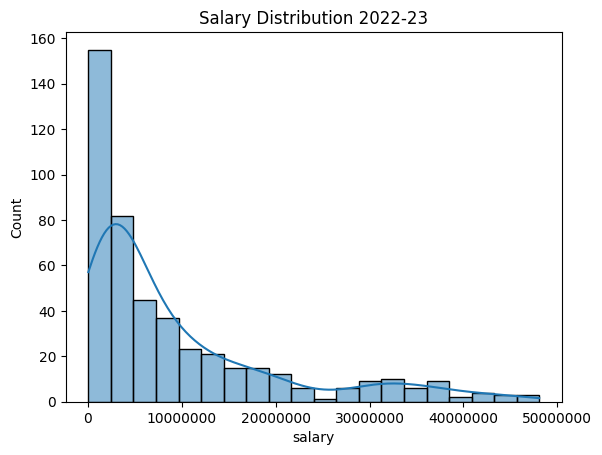

In [4]:
ax = sns.histplot(data = sa.df, x='salary', kde=True, bins = 20).set(title='Salary Distribution 2022-23')
plt.ticklabel_format(style='plain')
plt.show()


This chart confirms our suspicion about the salary spread, it's heavily skewed to the right. It appears that roughly half the league makes less than 5 million dollars per year, then the stars and superstars make the numbers we see in headlines. A quick computation of the median, mean, and other basic stats should provide the numbers to confirm this.

In [5]:
pd.DataFrame(sa.df['salary'].astype('Int64').describe().round()).T

,count,mean,std,min,25%,50%,75%,max
salary,464.0,9485580.0,10808855.0,58493.0,1958802.0,4580760.0,12622500.0,48070014.0


The computations show that the mean salary is 9.48 million dollars, while the median salary is just 4.58 millions dollars. This is reflected by the histogram.  Clearly even among the professional athletes in the NBA, there are distinct tiers of players and salary. This makes us curious about how the "other half" lives. In this context, we'd like to have a deeper look at the half of the population that makes less than the median.

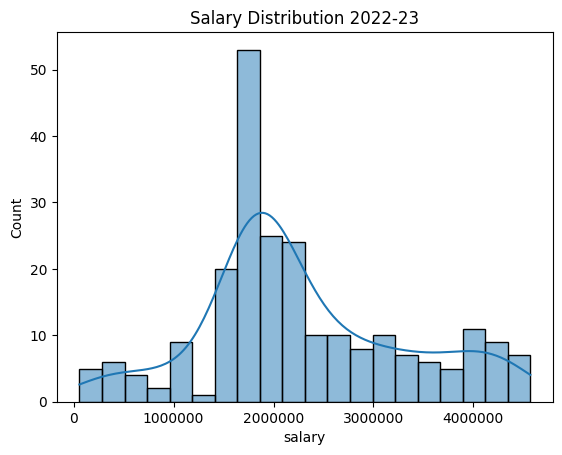

In [6]:
medianLess = sa.df.query('salary <= salary.median()')
ax = sns.histplot(data = medianLess, x='salary', kde=True, bins = 20).set(title='Salary Distribution 2022-23')
plt.ticklabel_format(style='plain')
plt.show()

This shows us that the majority of those who make less than the median made roughly between 1.5 to 2.25 million this year. In fact, this represents roughly 20% of the players from the dataset.  While making 1.5-2.25 million per year clearly puts one in the 1% of earners, these players are hardly in the same league when it comes to salary compared to the stars. 

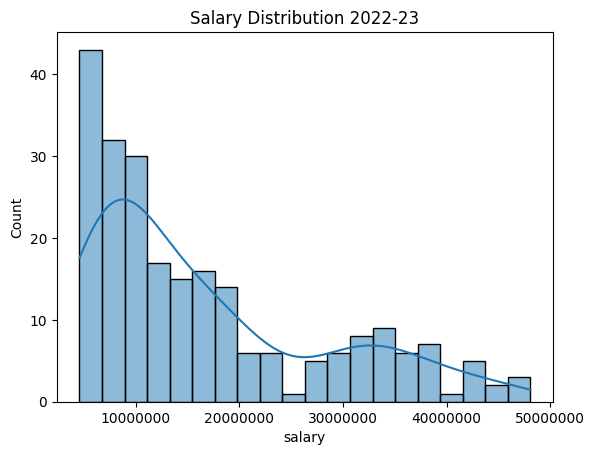

In [7]:
medianMore = sa.df.query('salary > salary.median()')
ax = sns.histplot(data = medianMore, x='salary', kde=True, bins = 20).set(title='Salary Distribution 2022-23')
plt.ticklabel_format(style='plain')
plt.show()

Looking at the other half of the median, we can see that roughly 20% earn 8-12 million, starts to wittle down but then strangely dip back up around 35 million a year.

We can see that while most players in the league earned over 1 million per year, their lifestyles are most likely not all equal. Most players can be considered wealthy, but other players are earning what is being called "generational wealth", securing financial security for themselves and their family within just a single year.

Now that we've observed the distribution and sample statistics of the salary, we can take a look at other things related to it.  For example, what is the maximum salary earned for each age, and is there anything telling about it?

In [36]:
max_salary_indices = sa.df.groupby('Age')['salary'].idxmax()
result = sa.df.loc[max_salary_indices, ['Age', 'salary', 'Tm']]

result['salary'] = result['salary'].apply(lambda x:'{:,}'.format(x))

result.T

Player,Jabari Smith Jr.,Paolo Banchero,Anthony Edwards,Zion Williamson,Luka Dončić,Trae Young,Brandon Ingram,Ben Simmons,Zach LaVine,Giannis Antetokounmpo,Bradley Beal,Kyrie Irving,Kawhi Leonard,John Wall,Jimmy Butler,Stephen Curry,Mike Conley,Kyle Lowry,Chris Paul,LeBron James,Andre Iguodala,Udonis Haslem
Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,42
salary,"8,882,640","11,055,120","10,733,400","13,534,817","37,096,500","37,096,500","31,650,600","35,448,672","37,096,500","42,492,492","43,279,250","38,917,057","42,492,492","47,345,760","37,653,300","48,070,014","22,680,000","28,333,334","28,400,000","44,474,988","1,836,090","1,836,090"
Tm,HOU,ORL,MIN,NOP,DAL,ATL,NOP,BRK,CHI,MIL,WAS,TOT,LAC,LAC,MIA,GSW,TOT,MIA,PHO,LAL,GSW,MIA


In [37]:
min_salary_indices = sa.df.groupby('Age')['salary'].idxmin()
result = sa.df.loc[min_salary_indices, ['Age', 'salary','Tm']]

result['salary'] = result['salary'].apply(lambda x:'{:,}'.format(x))

result.T

Player,Max Christie,Jaden Hardy,Brandon Boston Jr.,Christian Koloko,Stanley Umude,Jordan Goodwin,Anthony Lamb,Alize Johnson,Xavier Cooks,Ish Wainright,Javonte Green,Meyers Leonard,Michael Carter-Williams,Matthew Dellavedova,Blake Griffin,Robin Lopez,James Johnson,Wesley Matthews,Taj Gibson,LeBron James,Andre Iguodala,Udonis Haslem
Age,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,42
salary,"1,017,781","1,017,781","1,563,518","1,500,000","58,493","900,000","253,254","192,293","140,384","474,851","1,815,677","105,522","652,829","1,836,090","1,836,090","1,836,090","2,427,016","1,836,090","1,836,090","44,474,988","1,836,090","1,836,090"
Tm,LAL,DAL,LAC,TOR,DET,WAS,GSW,SAS,WAS,PHO,CHI,MIL,ORL,SAC,BOS,CLE,IND,MIL,WAS,LAL,GSW,MIA


its interesting to see that X about age.

Another question we had was if all positions made roughly the same, or if there's a distinct ranking.

In [9]:
positionMean = sa.df[['salary', 'Pos']].groupby(['Pos']).mean().sort_values(by='salary', ascending=False).round() 
positionMedian = sa.df[['salary', 'Pos']].groupby(['Pos']).median().sort_values(by='salary', ascending=False).round()

sa.side_by_side(positionMean, positionMedian)

,salary
Pos,
PG,12183395.0
PF,9390043.0
C,9338676.0
SG,8495827.0
SF,8292686.0
,salary
Pos,
PG,5853659.0
PF,4866840.0


Another story of mean vs median.  The median salaries are less than half of the mean salaries, once again showing the superstar contracts skewing the data.  Point Guards and Power Forwards secure the top 2 for earning, and then it shuffles around for the bottom 3 positions.  

Up until this point there has been plenty of mention of superstars and their salaries pulling the mean up. But in the statistical sense, that sounds like outliers. We can compute and search for outliers now to see if these superstar salaries are within the expected range or if they are indeed anomalies.

In [10]:
outliers = sa.df[sa.df['salary'] > sa.df['salary'].mean() + 3 * sa.df['salary'].std()]
outliers['salary'].sort_values(ascending=False)

Player
Stephen Curry            48070014
Russell Westbrook        47559433
John Wall                47345760
LeBron James             44474988
Kevin Durant             44119845
Bradley Beal             43279250
Giannis Antetokounmpo    42492492
Paul George              42492492
Kawhi Leonard            42492492
Damian Lillard           42492492
Name: salary, dtype: int64

Our computation shows that there's not just 1, but 10 outliers total, all with values greater than 40 million dollars.

In [11]:
outliers

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,pid,salary,PPG,APG,TRPG,SPG,BPG,astToTO,dollarPerMinute,dollarPerFG,dollarPerPoint
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Giannis Antetokounmpo,PF,28,MIL,63,63,2024,707,1278,0.553,47,171,0.275,660,1107,0.596,0.572,498,772,0.645,137,605,742,359,52,51,246,197,1959,antetgi01,42492492,31.1,5.7,11.8,0.8,0.8,1.5,20994.31,60102.53,21690.91
Bradley Beal,SG,29,WAS,50,50,1673,444,878,0.506,80,219,0.365,364,659,0.552,0.551,192,228,0.842,41,155,196,271,45,33,145,107,1160,bealbr01,43279250,23.2,5.4,3.9,0.9,0.7,1.9,25869.25,97475.79,37309.70
Stephen Curry,PG,34,GSW,56,56,1941,559,1133,0.493,273,639,0.427,286,494,0.579,0.614,257,281,0.915,39,302,341,352,52,20,179,117,1648,curryst01,48070014,29.4,6.3,6.1,0.9,0.4,2.0,24765.59,85992.87,29168.70
Kevin Durant,PF,34,TOT,47,47,1672,483,862,0.560,93,230,0.404,390,632,0.617,0.614,307,334,0.919,17,296,313,235,34,67,156,99,1366,duranke01,44119845,29.1,5.0,6.7,0.7,1.4,1.5,26387.47,91345.43,32298.57
Paul George,SG,32,LAC,56,56,1939,459,1004,0.457,158,426,0.371,301,578,0.521,0.536,256,294,0.871,45,297,342,288,83,20,176,159,1332,georgpa01,42492492,23.8,5.1,6.1,1.5,0.4,1.6,21914.64,92576.24,31901.27
LeBron James,PF,38,LAL,55,54,1954,609,1219,0.500,121,377,0.321,488,842,0.580,0.549,251,327,0.768,65,392,457,375,50,32,178,88,1590,jamesle01,44474988,28.9,6.8,8.3,0.9,0.6,2.1,22761.00,73029.54,27971.69
Kawhi Leonard,SF,31,LAC,52,50,1748,446,871,0.512,104,250,0.416,342,621,0.551,0.572,243,279,0.871,57,281,338,204,72,28,88,84,1239,leonaka01,42492492,23.8,3.9,6.5,1.4,0.5,2.3,24309.21,95274.65,34295.80
Damian Lillard,PG,32,POR,58,58,2107,556,1202,0.463,244,658,0.371,312,544,0.574,0.564,510,558,0.914,44,233,277,425,50,18,191,109,1866,lillada01,42492492,32.2,7.3,4.8,0.9,0.3,2.2,20167.30,76425.35,22771.97
John Wall,PG,32,LAC,34,3,755,138,338,0.408,33,109,0.303,105,229,0.459,0.457,77,113,0.681,14,78,92,178,27,12,80,59,386,walljo01,47345760,11.4,5.2,2.7,0.8,0.4,2.2,62709.62,343085.22,122657.41


Some notable observations of the outliers:
- Of the 10 outliers, 4 of them are point guards. This helps explain why the point guard mean salary is so high compared to the other positions. 
- 8 players are over the age of 30, with LeBron James being the oldest at 38. This is encouraging for younger players hoping to be able to earn as they age over time.
- 2 of these players, Russell Westbrook and John Wall, have a much lower PPG than the others. They are both over 30, so it's possible that these players are near the end of a max contract they signed back in their "prime", or perhaps they got injured and haven't been able to play relative to their earnings.
- There are no Centers in the list of outliers. The Center position had the 3rd highest mean salary and the 4th highest median salary.

In [12]:
#sa.side_by_side(sa.minLeast.head(),sa.minMost.head())

In [13]:
fig = px.bar(sa.minMost, y='dollarPerMinute')
fig.update_xaxes(showticklabels=False)
fig.show()

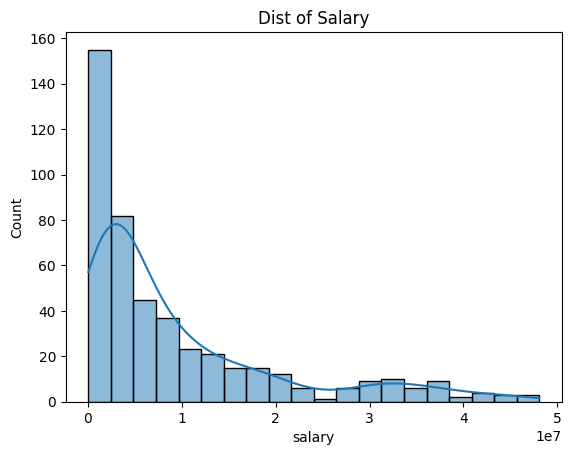

In [14]:
ax = sns.histplot(data = sa.df, x='salary', kde=True, bins = 20).set(title='Dist of Salary') #just testing

In [15]:
sa.salaryCorr

,PG,SG,SF,PF,C
PPG,0.663797,0.707965,0.723561,0.747194,0.819941
PTS,0.624945,0.660861,0.540515,0.671445,0.781178
FG,0.617011,0.650419,0.541938,0.659451,0.766507
APG,0.612316,0.536045,0.688828,0.710172,0.587795
TOV,0.607226,0.547209,0.474336,0.642019,0.667075
TRPG,0.600863,0.442466,0.536590,0.629951,0.676158
DRB,0.600775,0.461852,0.370762,0.575369,0.684859
FTA,0.598968,0.553579,0.519311,0.629661,0.739888
FGA,0.597939,0.651549,0.512856,0.629524,0.776713
TRB,0.594798,0.428826,0.348731,0.504672,0.630139


In [16]:
sa.df.loc[['LeBron James']]['Age']



Player
LeBron James    38
Name: Age, dtype: int64

In [17]:
#age = sa.df['Age'].rank(method='first', ascending= False) creates a rank for the age column and sorts oldest to youngest
#age.loc[['LeBron James']] returns 3, so lebron is the 3rd oldest player in the dataset.